# <center>Decision Trees</center>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

now, read data using pandas dataframe:

In [ ]:
# Your code here
my_data = pd.read_csv('play.csv')
my_data.head()

,outlook,temperature,humidity,wind,play
0,overcast,hot,high,weak,yes
1,overcast,cool,normal,strong,yes
2,overcast,mild,high,strong,yes
3,overcast,hot,normal,weak,yes
4,rainy,mild,high,weak,yes


## Practice 
What is the size of data? 

In [ ]:
# write your code here
my_data.shape

(15, 5)

## Pre-processing

Using <b>my_data</b> as the play.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [ ]:
X = my_data[['outlook','temperature','humidity','wind']].values
X[0:5]

array([['overcast', 'hot', 'high', 'weak'],
       ['overcast', 'cool', 'normal', 'strong'],
       ['overcast', 'mild', 'high', 'strong'],
       ['overcast', 'hot', 'normal', 'weak'],
       ['rainy', 'mild', 'high', 'weak']], dtype=object)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(np.unique(X[:,1]))
print(np.unique(X[:,2]))
print(np.unique(X[:,3]))

['cool' 'hot' 'mild']
['high' 'normal']
['strong' 'weak']


As you may figure out, some features in this dataset are categorical such as __Windy__ or __Outlook__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

In [ ]:
from sklearn import preprocessing
le_windy = preprocessing.LabelEncoder()
le_windy.fit(my_data['wind'].unique())
X[:,3] = le_windy.transform(X[:,3]) 
X[:,3]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=object)

In [ ]:
le_hum = preprocessing.LabelEncoder()
le_hum.fit(my_data['humidity'].unique())
X[:,2] = le_hum.transform(X[:,2])

In [ ]:

le_temp = preprocessing.LabelEncoder()
le_temp.fit(my_data['temperature'].unique())
X[:,1] = le_temp.transform(X[:,1])


le_outlook = preprocessing.LabelEncoder()
le_outlook.fit(my_data['outlook'].unique())
X[:,0] = le_outlook.transform(X[:,0])
X[:,0]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=object)

Now we can fill the target variable.

In [ ]:
y = my_data["play"]
y[0:5]

0    yes
1    yes
2    yes
3    yes
4    yes
Name: play, dtype: object

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [ ]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Practice
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [ ]:
# your code
print(X_trainset.shape)
print(y_trainset.shape)

(10, 4)
(10,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [ ]:
# your code
print(X_testset.shape)
print(y_testset.shape)

(5, 4)
(5,)


## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clf # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [ ]:
clf.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(200.88000000000002, 181.2, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

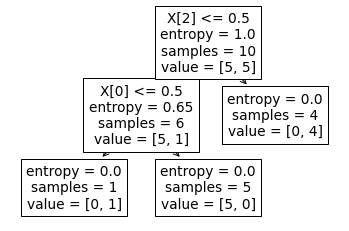

In [ ]:
from sklearn import tree
tree.plot_tree(clf) 

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [ ]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])

['yes' 'yes' 'yes' 'yes' 'no']
12    yes
4     yes
1     yes
6      no
2     yes
Name: play, dtype: object


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
clf.fit(X_trainset, y_trainset)  
print(my_data.columns[0:5])
print(clf.feature_importances_)

Index(['outlook', 'temperature', 'humidity', 'wind', 'play'], dtype='object')
[0.31960094 0.08282533 0.49084583 0.10672789]


In [ ]:
pred = clf.predict(X_testset)
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_testset, pred))

Random Forest's Accuracy:  0.4


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


# Save model

In [105]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Load model and predict

In [106]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
pred = loaded_model.predict(X_testset)
print(pred)

['yes' 'no' 'yes' 'yes' 'no']
